In [6]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
data = pd.read_csv("C:/Users/Pierre/Desktop/final_final_try/fer2013.csv")
print(data.shape)
data.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [8]:
#check target labels
#emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotion_labels = {0:'Angry', 1:'Digust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
emotion_counts = data['emotion'].value_counts(sort=True).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_labels)
emotion_counts

,emotion,number
0,Happy,8989
1,Neutral,6198
2,Sad,6077
3,Fear,5121
4,Angry,4953
5,Surprise,4002
6,Digust,547


C:\Users\Pierre\AppData\Local\Temp\ipykernel_22448\1626966416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)


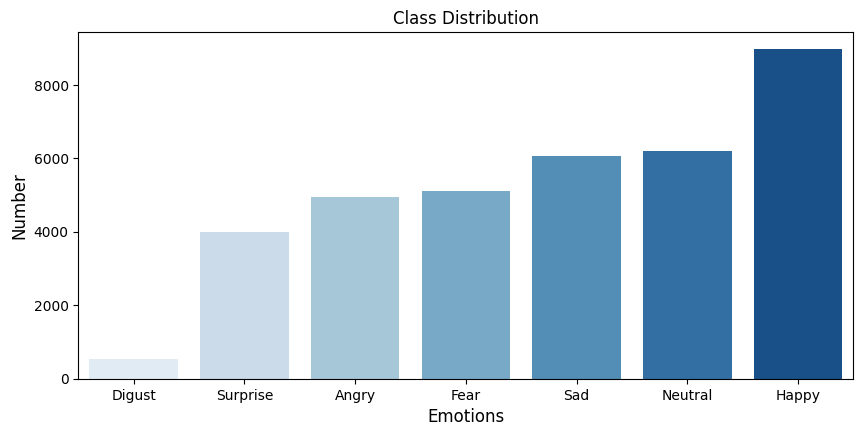

In [9]:
# Sort emotions by the number of images
emotion_counts_sorted = emotion_counts.sort_values(by='number', ascending=True)

# Generate a gradient of colors from light blue to blue
colors = sns.color_palette("Blues", len(emotion_counts_sorted))

# Plotting the bar graph with sorted emotions and gradient colors
plt.figure(figsize=(10, 4.5))
sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)
plt.title('Class Distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

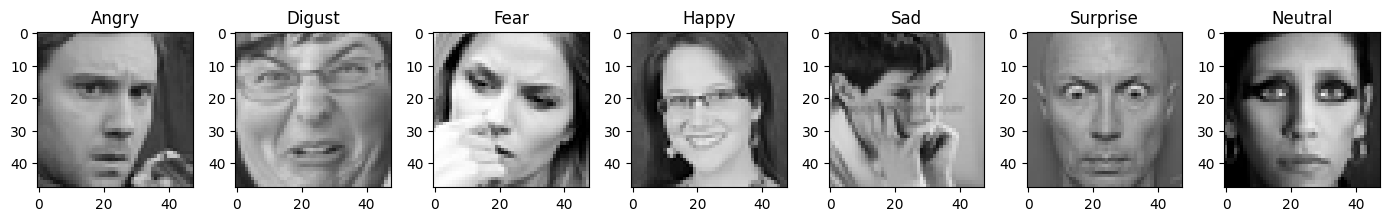

In [10]:
def row2image(row):
    pixels = row['pixels']
    emotion = emotion_labels[row['emotion']]
    img = np.array(pixels.split(), dtype=np.uint8)
    img = img.reshape(48, 48)
    # Repeat the single-channel image to create a three-channel image
    image = np.repeat(img[:, :, np.newaxis], 3, axis=2)
    return image, emotion

plt.figure(figsize=(14,9))
for i in range(1, 8):
    face = data[data['emotion'] == i-1].iloc[0]
    img, emotion = row2image(face)
    plt.subplot(1, 7, i)
    plt.imshow(img, cmap='gray')  # Plot grayscale image
    plt.title(emotion)
plt.tight_layout()
plt.show()

In [11]:
x = []
for pixel_sequence in data["pixels"]:
    pixels = np.array(pixel_sequence.split(" "), dtype='uint8').reshape(48, 48, 1)
    x.append(pixels)
x = np.array(x) / 255.0  # Normalize pixel values
y = to_categorical(data["emotion"], num_classes = 7)

In [12]:
# Split dataset into train and test sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

# Define LeNet-5 model
model = Sequential()

model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(48, 48, 1)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))


model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())


model.add(layers.Dense(120, activation='relu'))

 
model.add(layers.Dense(84, activation="relu"))
 

model.add(layers.Dense(7, activation='softmax'))

# Print model summary

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 44, 44, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 18, 18, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1296)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       155,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           595 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,971 (660.04 KB)

 Trainable params: 168,971 (660.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy',])

# Train the model
history = model.fit(train_x, train_y, 
                    epochs = 30, 
                    batch_size = 48, 
                    validation_data = (test_x, test_y), 
                    verbose=1)

Epoch 1/30
599/599 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.3017 - loss: 1.7269 - val_accuracy: 0.4244 - val_loss: 1.4953
Epoch 2/30
599/599 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.4446 - loss: 1.4368 - val_accuracy: 0.4547 - val_loss: 1.3966
Epoch 3/30
599/599 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4834 - loss: 1.3287 - val_accuracy: 0.4993 - val_loss: 1.3072
Epoch 4/30
599/599 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5233 - loss: 1.2482 - val_accuracy: 0.5085 - val_loss: 1.2821
Epoch 5/30
599/599 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5521 - loss: 1.1750 - val_accuracy: 0.5131 - val_loss: 1.2609
Epoch 6/30
599/599 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5899 - loss: 1.0836 - val_accuracy: 0.5198 - val_loss: 1.2613
Epoch 7/30
599/599 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6178 - loss: 1.0175 - val_accuracy: 0.5137 - val_loss: 1.2768
Epoch 8/30
599/599 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6414 - loss: 0.9570 - val_

In [15]:
model.save("lenet.h5")

In [16]:
from sklearn.metrics import accuracy_score
from keras.models import load_model
new_model= load_model("lenet.h5")

test_true = np.argmax(test_y,axis=1)

test_pred = np.argmax(new_model.predict(test_x), axis = 1)

print("Test Accuracy {:.2f}".format(accuracy_score(test_true, test_pred)*100))

train_true = np.argmax(train_y,axis=1)

train_pred = np.argmax(new_model.predict(train_x), axis = 1)

print("Train Accuracy {:.2f}".format(accuracy_score(train_true, train_pred)*100))

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy 50.14
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Train Accuracy 95.85
